### **<span style = 'color : purple'>Normality of Residual</span>**

- **What happens when this assumption is violated**
1. Inaccurate Hypothesis test
2. Invalid Confidence Intervals
3. Mode performance

- **How to check this assumption**?
1. Histogram of residuals
2. Q-Q plots
3. Statistical Test : omnibus test, jarque-bera test and shapiro wilk test

- **What to do when the assumption fails?**
1. Model selection technique
2. Roburst regression
3. Non- parametric or semi-parametric methods

### **<span style = 'color:yellow'>Histogram and Q-Q Plot</span>**

In [3]:
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Generate a synthetic dataset
np.random.seed(42)
x = np.random.rand(100, 1)
y = 3 * x + np.random.normal(0, 0.3, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred


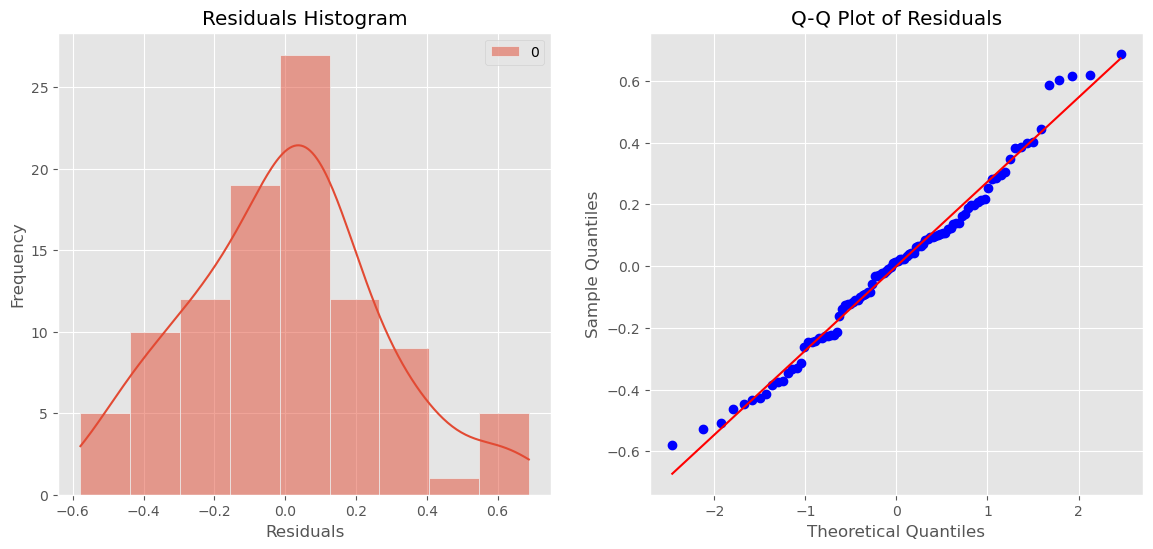

In [6]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(122)
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [7]:
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")


Mean of residuals: 0.0000


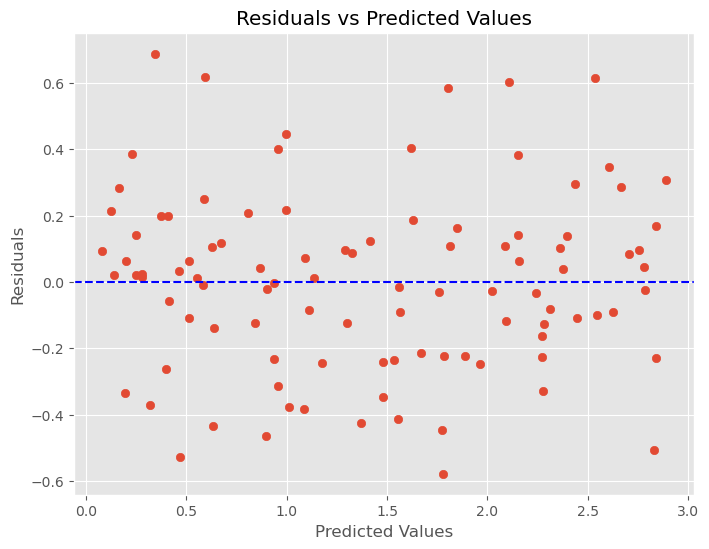

In [9]:
# residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='b', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### **Non-Normal distribution**

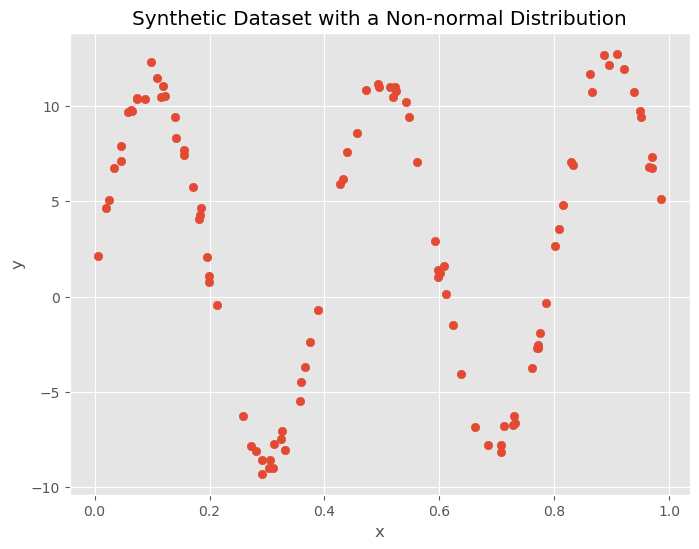

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Dataset with a Non-normal Distribution')
plt.show()


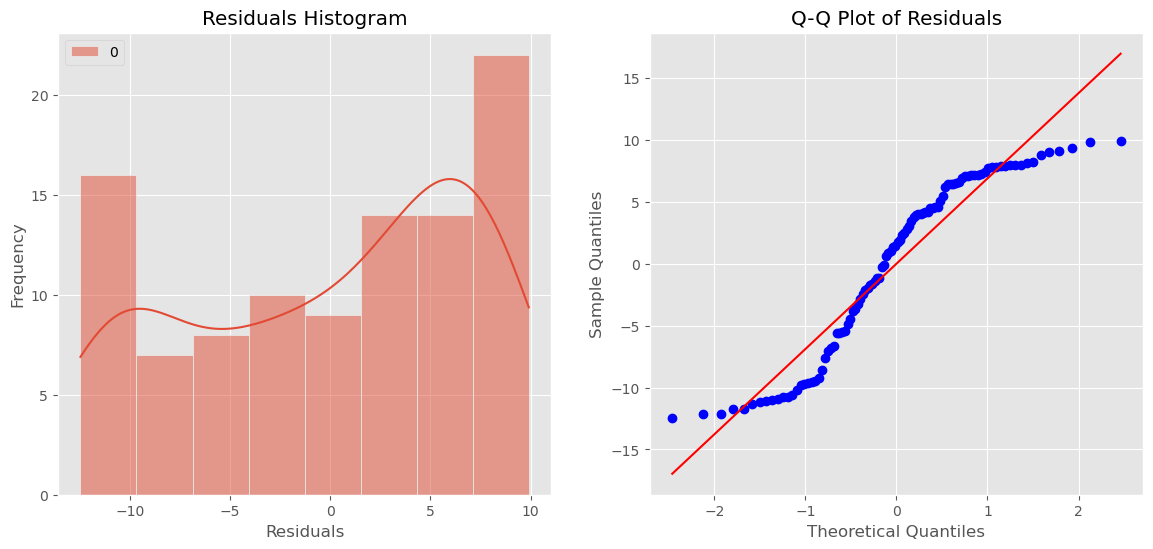

In [11]:
# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(122)
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [12]:
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")


Mean of residuals: -0.0000


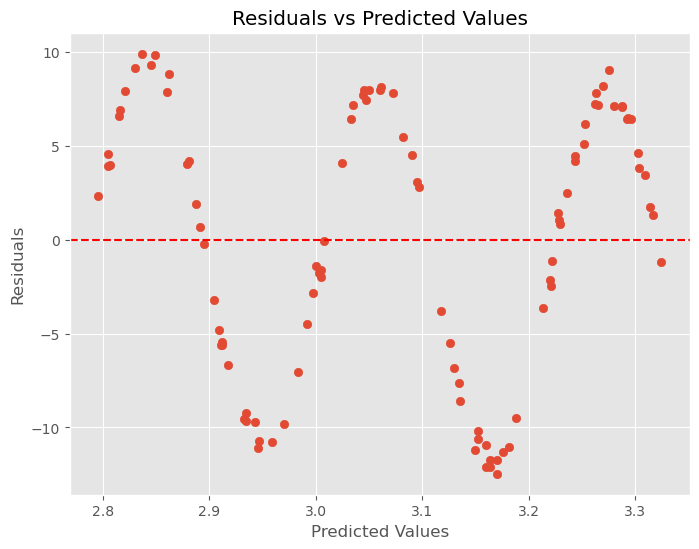

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### **Omnibus Test**

In [14]:
# Generate a synthetic dataset
np.random.seed(42)
x = np.random.rand(100, 1)
y = 3 * x + np.random.normal(0, 0.3, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Calculate skewness, kurtosis, Omnibus test statistic, and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)

print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")


Skewness: 0.2173
Kurtosis: -0.0712
Omnibus test statistic: 0.9002
Omnibus test p-value: 0.6376


### **Non-Normal Distribution**

In [15]:
np.random.seed(42)

# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Calculate skewness, kurtosis, Omnibus test statistic, and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)

print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")


Skewness: -0.3717
Kurtosis: -1.2746
Omnibus test statistic: 50.6234
Omnibus test p-value: 0.0000


### **Shapiro-wilk Test**

In [18]:
from scipy.stats import shapiro
shapiro(x)


ShapiroResult(statistic=0.9408808946609497, pvalue=0.00021826985175721347)

In [19]:
shapiro(y)


ShapiroResult(statistic=0.9029709696769714, pvalue=1.9555300241336226e-06)